In [2]:
from google.colab import files

In [3]:
uploaded = files.upload()

Saving brent updated.csv to brent updated.csv


In [4]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 66.6 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


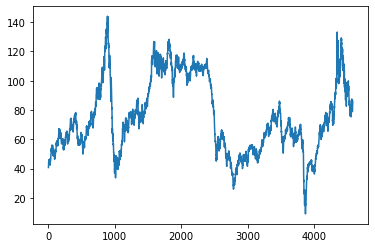

4587


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('brent updated.csv')
y = data.iloc[:,1]
y.plot()
plt.show()
print(len(y))

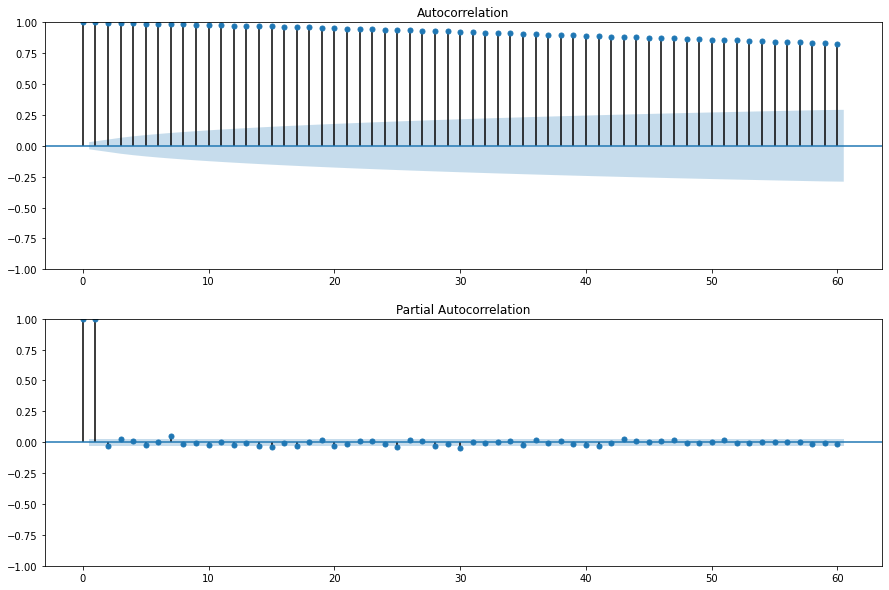

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
nlags = 60 # play with this parameter

fig, ax = plt.subplots(2,1, figsize = (15,10))
plot_acf(y, lags = nlags,  ax=ax[0])
plot_pacf(y, lags = nlags, method="ols",ax=ax[1])
plt.show()

This code will display the autocorrelation and the partial autocorrelation. From here we can se 2 things. The ACF shows a gradual decrease to 0 which means there's no stationarity and the PACF shows both sinusoidal lags and a first lag which is almost 100% correlated with lag 0. This means there is seasonality but it is hidden by the high volatility of the time series and also means the best point prediction for the next period is the last period. 

In [7]:
s = 5 #seasonal parameter
import statsmodels.api as sm
from pmdarima.arima import ndiffs, nsdiffs

# Coincide con lo de R
print('Regular difference:', ndiffs(y, alpha = 0.05, test = 'adf'))
print('Seasonal difference:', nsdiffs(y, m = s, test = 'ocsb'))

Regular difference: 1
Seasonal difference: 0


Here we got rid of the very correlated lag by applying one regular difference to the model, however, by applying a log transformation, we can see the clusters of volatity that usually indicate a GARCH time series. 

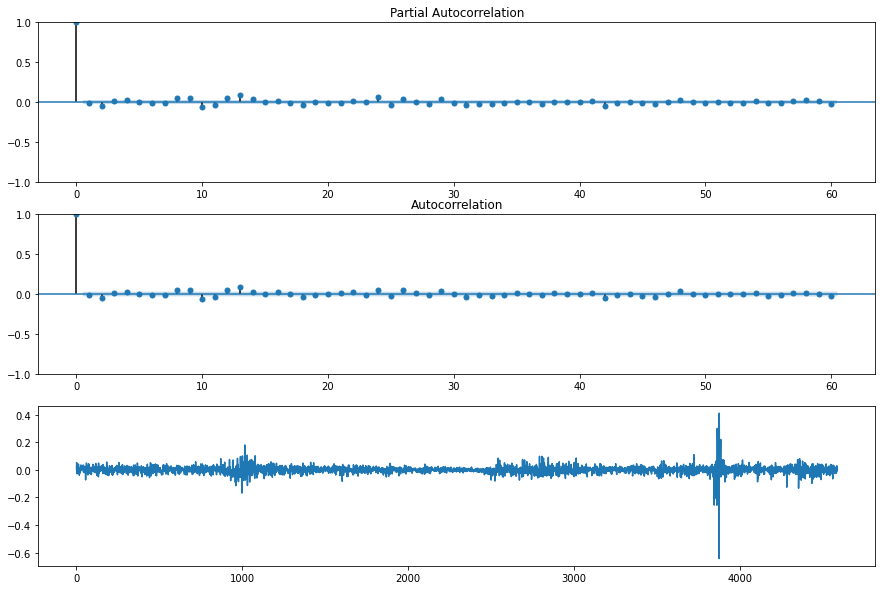

In [8]:
r = np.log(y).diff().dropna()

fig, ax = plt.subplots(3,1, figsize = (15,10))
plot_pacf(r, lags = nlags, method="ols", ax=ax[0])
plot_acf(r, lags = nlags, ax=ax[1])
ax[2] = plt.plot(r)
plt.show()